<a href="https://colab.research.google.com/github/sielefaith/Neural-Nets/blob/feature/Regression(logical).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

['5' '0' '4' ... '4' '5' '6']
[5. 0. 4. ... 4. 5. 6.]
digit 0 appears 6903 times
digit 1 appears 7877 times
digit 2 appears 6990 times
digit 3 appears 7141 times
digit 4 appears 6824 times
digit 5 appears 6313 times
digit 6 appears 6876 times
digit 7 appears 7293 times
digit 8 appears 6825 times
digit 9 appears 6958 times


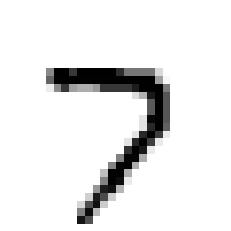

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [1. 2. 1. ... 2. 1. 2.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [[0. 1. 0. ... 1. 0. 1.]]
Reached epoch 0 cost J = 0.685799
Reached epoch 500 cost J = 0.154386
Reached epoch 1000 cost J = 0.108590
Reached epoch 1500 cost J = 0.089566
Reached epoch 2000 cost J = 0.078767
Reached epoch 2500 cost J = 0.071669
Reached epoch 3000 cost J = 0.066580
Reached epoch 3500 cost J = 0.062715
Reached epoch 4000 cost J = 0.059656
Reached epoch 4500 cost J = 0.057158
Reached epoch 5000 cost J = nan
0.5298312


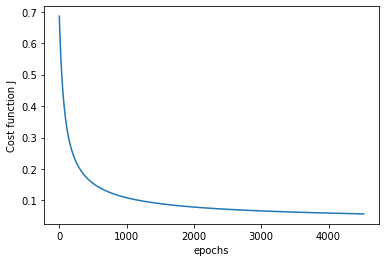

In [8]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

mnist = fetch_openml('mnist_784')
X,y = mnist["data"], mnist["target"]
print(y)
#convert string to float
Y = y.astype(np.float)
print(Y)

for i in range(10):
 print ("digit", i, "appears", np.count_nonzero(Y == i), "times")

def plot_digit(some_digit):
  some_digit_image = some_digit.reshape(28,28)
  plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation 
= "nearest")
  plt.axis("off")
  plt.show()

plot_digit(X[36003])

# extract from our dataset only the images that represent a 1 or a 2
X_train = X[np.any([Y == 1,Y == 2], axis = 0)]
y_train = Y[np.any([Y == 1,Y == 2], axis = 0)]
print(X_train,y_train)
#input observations must be normalized
# gray levels in the source images go from 0 to 255
X_train_normalised = X_train/255.0

#In each column, we want to have an input observation, and each row should represent a feature (a pixel gray value), so we must reshape the tensors
X_train_tr = X_train_normalised.transpose()
y_train_tr = y_train.reshape(1,y_train.shape[0])

# define a variable n_dim to contain the number of features
n_dim = X_train_tr.shape[0]

# we will build our cost function with the assumptions that our class’s labels are 0 and 1, so we must rescale our y_train_tr array
#all images representing a 1 will have a label of 0, and all images representing a 2 will have a label of 1
y_train_shifted = y_train_tr - 1

#Finally, let’s use some proper names for our Python variables.
Xtrain = X_train_tr
ytrain = y_train_shifted

print(Xtrain,ytrain)

#TF
# let’s define placeholders and variables.
tf.reset_default_graph()
X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [1, None])
learning_rate = tf.placeholder(tf.float32, shape=())
W = tf.Variable(tf.zeros([1, n_dim]))
b = tf.Variable(tf.zeros(1))
init = tf.global_variables_initializer()

# define cost function (cross entropy) and a different neuron output (the sigmoid function).
y_ = tf.sigmoid(tf.matmul(W,X)+b)
cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
###################################################
#function to run model
def run_logistic_model(learning_r, training_epochs, train_obs, 
train_labels, debug = False):
  sess = tf.Session()
  sess.run(init)
  cost_history = np.empty(shape=[0], dtype = float)
  for epoch in range(training_epochs+1):
    sess.run(training_step, feed_dict = {X: train_obs, Y: train_labels, 
learning_rate: learning_r})
    cost_ = sess.run(cost, feed_dict={ X:train_obs, Y: train_labels, 
learning_rate: learning_r})
    cost_history = np.append(cost_history, cost_)
    if (epoch % 500 == 0) & debug:
      print("Reached epoch",epoch,"cost J =", str.format('{0:.6f}', 
cost_))
  return sess, cost_history





#run the model
sess, cost_history = run_logistic_model(learning_r = 0.005,
 training_epochs = 5000,
 train_obs = Xtrain,
 train_labels = ytrain,
 debug = True)

 #accuracy
correct_prediction1 = tf.equal(tf.greater(y_, 0.5), tf.equal(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction1, tf.float32))
print(sess.run(accuracy, feed_dict={X:Xtrain, Y: ytrain, learning_rate: 
0.05}))

plt.plot(cost_history)
plt.xlabel("epochs")
plt.ylabel("Cost function J")
plt.show()
####################


